# Análisis de instrumentos financieros

## El objetivo de este análisis es conocer en qué instrumento financiero nos conviene invertir en el largo plazo

### 1.- Importamos información de yahoo finance

In [24]:
# Instalar pandas_datareader
#! pip install pandas_datareader

In [25]:
# Importar librerías
import numpy as np
import pandas as pd
from pandas_datareader import data

In [26]:
# Descargar la información de Facaebook, Twitter y Tesla: FB2A.BE, TWTR, TSLA
FACE=data.DataReader('FB2A.BE', data_source='yahoo',start='2010-1-1')
TWIT=data.DataReader('TWTR', data_source='yahoo',start='2010-1-1')
TESLA=data.DataReader('TSLA', data_source='yahoo',start='2010-1-1')

In [27]:
FACE

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,35.000000,29.980000,35.000000,32.630001,12213,32.630001
2012-05-21,30.600000,25.889999,30.600000,27.334999,14430,27.334999
2012-05-22,27.000000,25.090000,26.400000,25.500000,2500,25.500000
2012-05-23,25.645000,23.799999,23.799999,25.365000,1070,25.365000
2012-05-24,26.195000,25.459999,25.684999,25.459999,547,25.459999
...,...,...,...,...,...,...
2022-04-25,174.339996,168.839996,170.259995,174.100006,6,174.100006
2022-04-26,174.839996,169.000000,173.860001,171.119995,112,171.119995
2022-04-27,169.580002,165.100006,167.199997,165.399994,10,165.399994


In [28]:
TWIT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-11-07,50.090000,44.000000,45.099998,44.900002,117701600,44.900002
2013-11-08,46.939999,40.689999,45.930000,41.650002,27925300,41.650002
2013-11-11,43.000000,39.400002,40.500000,42.900002,16113900,42.900002
2013-11-12,43.779999,41.830002,43.660000,41.900002,6316700,41.900002
2013-11-13,42.869999,40.759998,41.029999,42.599998,8688300,42.599998
...,...,...,...,...,...,...
2022-04-25,52.290001,50.240002,51.020000,51.700001,176803600,51.700001
2022-04-26,51.619999,49.430000,51.570000,49.680000,115020400,49.680000
2022-04-27,49.259998,47.820000,49.060001,48.639999,59106900,48.639999


In [29]:
TESLA

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000
2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000
2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...
2022-04-25,1008.619995,975.299988,978.969971,998.020020,22780400.0,998.020020
2022-04-26,1000.000000,875.000000,995.429993,876.419983,45377900.0,876.419983
2022-04-27,918.000000,877.359985,898.580017,881.510010,25652100.0,881.510010


### 2.- Definimos nuestra base final

In [30]:
#Unimos las bases creando una nueva con la fecha
portafolio=pd.merge(FACE,TWIT, on='Date', how='left')
portafolio

,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
Date,,,,,,,,,,,,
2012-05-18,35.000000,29.980000,35.000000,32.630001,12213,32.630001,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,30.600000,25.889999,30.600000,27.334999,14430,27.334999,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-22,27.000000,25.090000,26.400000,25.500000,2500,25.500000,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-23,25.645000,23.799999,23.799999,25.365000,1070,25.365000,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-24,26.195000,25.459999,25.684999,25.459999,547,25.459999,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,174.339996,168.839996,170.259995,174.100006,6,174.100006,52.290001,50.240002,51.020000,51.700001,176803600.0,51.700001
2022-04-26,174.839996,169.000000,173.860001,171.119995,112,171.119995,51.619999,49.430000,51.570000,49.680000,115020400.0,49.680000
2022-04-27,169.580002,165.100006,167.199997,165.399994,10,165.399994,49.259998,47.820000,49.060001,48.639999,59106900.0,48.639999


In [31]:
# Reordenamos las columnas que nos interesan: Adj Close porque es el precio de cierre ajustado el que nos interesa
portafolio=portafolio[['Adj Close_x','Adj Close_y']]
portafolio['FACE']=portafolio['Adj Close_x']
portafolio['TWIT']=portafolio['Adj Close_y']

<ipython-input-31-f8133b7a4acb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portafolio['FACE']=portafolio['Adj Close_x']
<ipython-input-31-f8133b7a4acb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portafolio['TWIT']=portafolio['Adj Close_y']


In [32]:
#Eliminamos aquellas que no vamos a utilizar
portafolio.drop('Adj Close_x',axis=1, inplace=True)
portafolio.drop('Adj Close_y',axis=1, inplace=True)

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
portafolio

,FACE,TWIT
Date,,
2012-05-18,32.630001,NaN
2012-05-21,27.334999,NaN
2012-05-22,25.500000,NaN
2012-05-23,25.365000,NaN
2012-05-24,25.459999,NaN
...,...,...
2022-04-25,174.100006,51.700001
2022-04-26,171.119995,49.680000
2022-04-27,165.399994,48.639999


In [34]:
# Generamos los mismos cálculos con SP
portafolio=pd.merge(portafolio,TESLA, on='Date', how='left')
portafolio

,FACE,TWIT,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,
2012-05-18,32.630001,NaN,5.692000,5.366000,5.674000,5.512000,8082500.0,5.512000
2012-05-21,27.334999,NaN,5.852000,5.424000,5.516000,5.754000,7376000.0,5.754000
2012-05-22,25.500000,NaN,6.268000,6.000000,6.020000,6.160000,11831000.0,6.160000
2012-05-23,25.365000,NaN,6.210000,5.900000,6.112000,6.204000,6102000.0,6.204000
2012-05-24,25.459999,NaN,6.250000,5.938000,6.250000,6.056000,5378000.0,6.056000
...,...,...,...,...,...,...,...,...
2022-04-25,174.100006,51.700001,1008.619995,975.299988,978.969971,998.020020,22780400.0,998.020020
2022-04-26,171.119995,49.680000,1000.000000,875.000000,995.429993,876.419983,45377900.0,876.419983
2022-04-27,165.399994,48.639999,918.000000,877.359985,898.580017,881.510010,25652100.0,881.510010


In [35]:
# Filtramos las columnas finales
portafolio=portafolio[['FACE','TWIT','Adj Close']]
portafolio['TESLA']=portafolio['Adj Close']

<ipython-input-35-79e450941ad5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portafolio['TESLA']=portafolio['Adj Close']


In [36]:
portafolio.columns

Index(['FACE', 'TWIT', 'Adj Close', 'TESLA'], dtype='object')

In [37]:
# Eliminamos la columna que ya renombramos anteriormente
portafolio.drop('Adj Close',axis=1, inplace=True)

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
# Tenemos nuestra base final
portafolio

,FACE,TWIT,TESLA
Date,,,
2012-05-18,32.630001,NaN,5.512000
2012-05-21,27.334999,NaN,5.754000
2012-05-22,25.500000,NaN,6.160000
2012-05-23,25.365000,NaN,6.204000
2012-05-24,25.459999,NaN,6.056000
...,...,...,...
2022-04-25,174.100006,51.700001,998.020020
2022-04-26,171.119995,49.680000,876.419983
2022-04-27,165.399994,48.639999,881.510010


In [39]:
# Guardamos nuestra base final con otro nombre y revisamos el tipo de datos
df=portafolio

In [40]:
df.dtypes

FACE     float64
TWIT     float64
TESLA    float64
dtype: object

### 3.- Exploramos la base final

In [41]:
# Validar que no tengamos valores vacíos
df.isnull().sum()

FACE       0
TWIT     425
TESLA     63
dtype: int64

In [42]:
# Graficamos para saber a partir de qué fecha están vacíos
import matplotlib.pyplot as plt

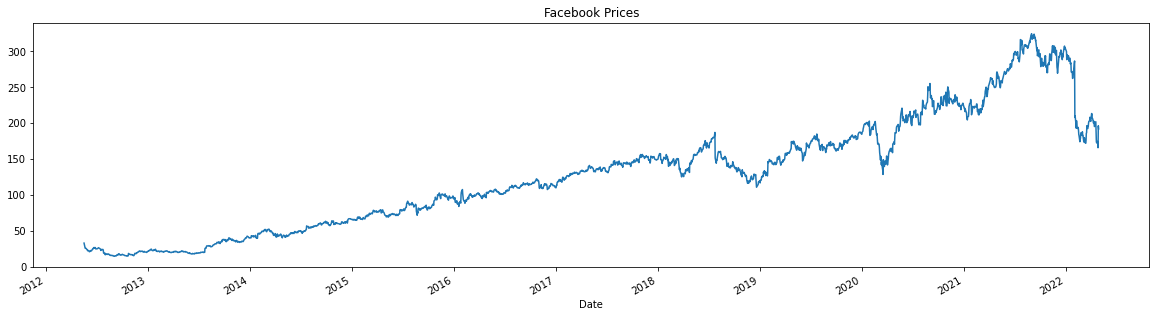

In [43]:
df['FACE'].plot(figsize=(20,5), title = "Facebook Prices")
plt.show()

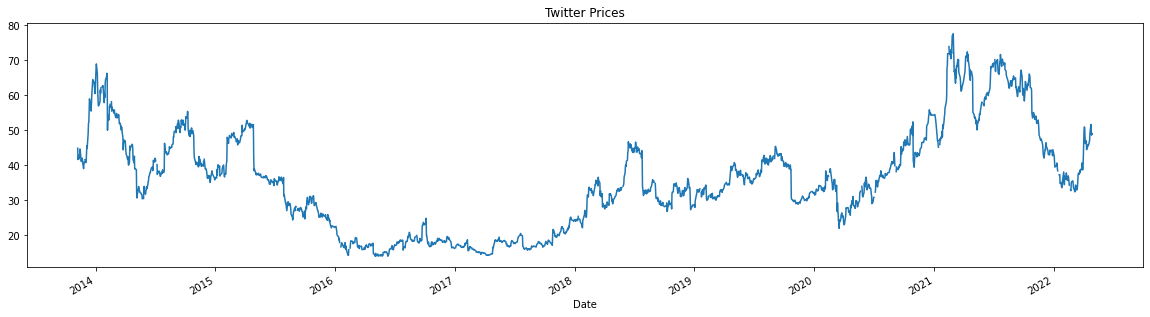

In [44]:
df['TWIT'].plot(figsize=(20,5), title = "Twitter Prices")
plt.show()

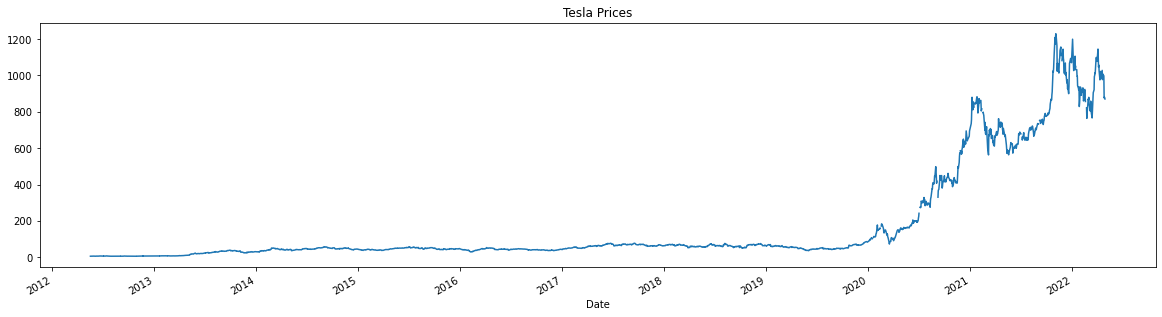

In [45]:
df['TESLA'].plot(figsize=(20,5), title = "Tesla Prices")
plt.show()

### 4.- Análisis: rendimientos y volatilidad

In [50]:
# Primero filtramos nuestra base a partir del 2014
df=df.loc['2014-01-01':,:]

In [51]:
df

,FACE,TWIT,TESLA
Date,,,
2014-01-02,39.855000,67.500000,30.020000
2014-01-03,40.174999,69.000000,29.912001
2014-01-06,39.935001,66.290001,29.400000
2014-01-07,42.840000,61.459999,29.872000
2014-01-08,42.439999,59.290001,30.256001
...,...,...,...
2022-04-25,174.100006,51.700001,998.020020
2022-04-26,171.119995,49.680000,876.419983
2022-04-27,165.399994,48.639999,881.510010


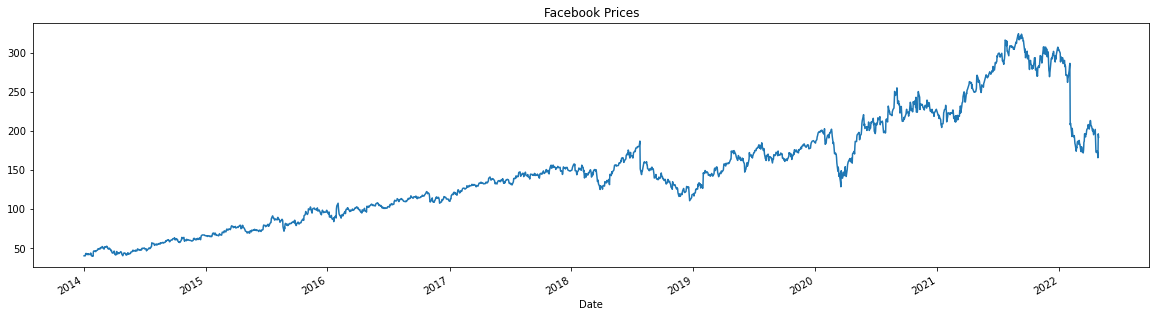

In [52]:
df['FACE'].plot(figsize=(20,5), title = "Facebook Prices")
plt.show()

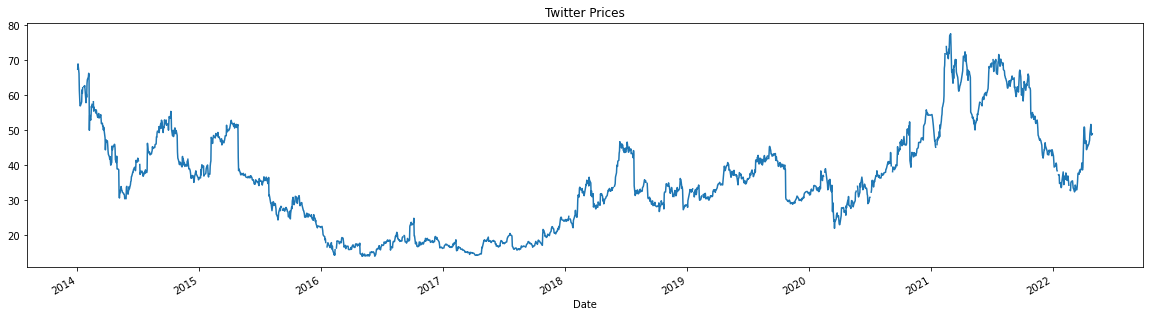

In [53]:
df['TWIT'].plot(figsize=(20,5), title = "Twitter Prices")
plt.show()

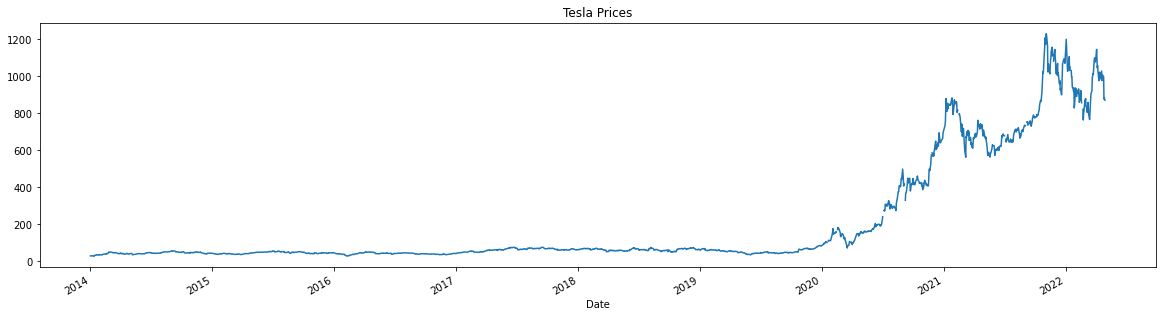

In [54]:
df['TESLA'].plot(figsize=(20,5), title = "Tesla Prices")
plt.show()

In [55]:
df.isnull().sum()

FACE      0
TWIT     52
TESLA    52
dtype: int64

#### Ya que hemos limpiado la base, queremos estudiar el rendimiento y su variabilidad por lo que estudiaremos los rendimientos en lugar de los precios puesto que es lo que a nosotros nos interesa al momento de realizar una inversión

In [56]:
# Podemos ver que aquí solo tenemos precios y no rendimientos
df.head()

,FACE,TWIT,TESLA
Date,,,
2014-01-02,39.855000,67.500000,30.020000
2014-01-03,40.174999,69.000000,29.912001
2014-01-06,39.935001,66.290001,29.400000
2014-01-07,42.840000,61.459999,29.872000
2014-01-08,42.439999,59.290001,30.256001


In [57]:
# Calculamos los rendimientos
df['Rend_FACE']=df['FACE'].pct_change(1)
df['Rend_TWIT']=df['TWIT'].pct_change(1)
df['Rend_TESLA']=df['TESLA'].pct_change(1)

<ipython-input-57-d58e905d7f2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rend_FACE']=df['FACE'].pct_change(1)
<ipython-input-57-d58e905d7f2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rend_TWIT']=df['TWIT'].pct_change(1)
<ipython-input-57-d58e905d7f2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [58]:
# Borramos los precios
df.drop('FACE',axis=1, inplace=True)
df.drop('TWIT',axis=1, inplace=True)
df.drop('TESLA',axis=1, inplace=True)

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
# Multiplicamos los resultados por 100 puesto que son %
df=df.round(2).mul(100)
df

,Rend_FACE,Rend_TWIT,Rend_TESLA
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,1.0,2.0,-0.0
2014-01-06,-1.0,-4.0,-2.0
2014-01-07,7.0,-7.0,2.0
2014-01-08,-1.0,-4.0,1.0
...,...,...,...
2022-04-25,1.0,6.0,-1.0
2022-04-26,-2.0,-4.0,-12.0
2022-04-27,-3.0,-2.0,1.0


#### Análisis descriptivo estadístico

In [60]:
df.describe(include='all').round(2)

,Rend_FACE,Rend_TWIT,Rend_TESLA
count,2111.00,2111.00,2111.00
mean,0.10,0.04,0.22
std,2.25,3.35,3.45
min,-27.00,-24.00,-21.00
25%,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00
75%,1.00,1.00,2.00
max,18.00,27.00,24.00


In [61]:
#0.10% = 0.001
# Entre más rendimiento mayor riesgo/ volatidalidad (std)

#### Un coeficiente que nos indica la relación riesgo retorno es el Coeficiente de variación: te indica qué tan variable es tu instrumento.
#### Calcularemos Coef de Var: STD/Mean

In [62]:
# Calculamos el coeficiente de variación de GOOG
Rend_FACE_mean=df['Rend_FACE'].mean()
Rend_FACE_desvest=df['Rend_FACE'].std()
Rend_FACE_coefvar=Rend_FACE_desvest/Rend_FACE_mean
print(Rend_FACE_mean)
print(Rend_FACE_desvest)
print(Rend_FACE_coefvar)

0.10137375651350071
2.2456177456918156
22.151864771754312


In [63]:
#Calculamos el coeficiente de variación de VOO
Rend_TWIT_mean=df['Rend_TWIT'].mean()
Rend_TWIT_desvest=df['Rend_TWIT'].std()
Rend_TWIT_coefvar=Rend_TWIT_desvest/Rend_TWIT_mean
print(Rend_TWIT_mean)
print(Rend_TWIT_desvest)
print(Rend_TWIT_coefvar)

0.04216011369019422
3.3543667337931358
79.56256376446416


In [64]:
#Calculamos el coeficiente de variación de SP
Rend_TESLA_mean=df['Rend_TESLA'].mean()
Rend_TESLA_desvest=df['Rend_TESLA'].std()
Rend_TESLA_coefvar=Rend_TESLA_desvest/Rend_TESLA_mean
print(Rend_TESLA_mean)
print(Rend_TESLA_desvest)
print(Rend_TESLA_coefvar)

0.22406442444339175
3.4533463081205094
15.412291874085403


In [65]:
# Calculamos tabla resumen
resumen=pd.DataFrame(data=[[Rend_FACE_mean,Rend_TWIT_mean,Rend_TESLA_mean],[Rend_FACE_desvest,Rend_TWIT_desvest,Rend_TESLA_desvest],[Rend_FACE_coefvar,Rend_TWIT_coefvar,Rend_TESLA_coefvar]],columns=['FACE','TWIT','TESLA'])
resumen

,FACE,TWIT,TESLA
0,0.101374,0.042160,0.224064
1,2.245618,3.354367,3.453346
2,22.151865,79.562564,15.412292


In [66]:
# Cambiamos el nombre del index
resumen.set_index([['Rendimiento','Desvest','Coef de Var']],inplace=True)
resumen

,FACE,TWIT,TESLA
Rendimiento,0.101374,0.042160,0.224064
Desvest,2.245618,3.354367,3.453346
Coef de Var,22.151865,79.562564,15.412292


### TESLA es la acción con mayor rendimiento y con mayor riesgo
### FACE tiene mejor rendimeinto que TWIT y menor riesgo. Tiene variabilidad ligeramente mayor a TESLA pero con menor riesgo.
### Esta decisión depende de qué tan abierto al riesgo eres